In [1]:
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import nc_time_axis
import cftime
import xclim as xc

ds_piC = xc.atmos.tx_min(xr.open_dataset('/badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/piControl/r1i1p1f2/day/tasmin/gn/files/d20191008/tasmin_day_UKESM1-0-LL_piControl_r1i1p1f2_gn_20500101-21491230.nc').sel(time = slice("2090", "2100")).tasmin, freq='MS')
ds_585 = xc.atmos.tx_min(xr.open_dataset('/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp585/r1i1p1f2/day/tasmin/gn/files/d20190726/tasmin_day_UKESM1-0-LL_ssp585_r1i1p1f2_gn_20500101-21001230.nc').sel(time = slice("2090", "2100")).tasmin, freq='MS')
ds_245 = xc.atmos.tx_min(xr.open_dataset('/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/r10i1p1f2/day/tasmin/gn/files/d20210507/tasmin_day_UKESM1-0-LL_ssp245_r10i1p1f2_gn_20510101-21001230.nc').sel(time = slice("2090", "2100")).tasmin, freq='MS')
ds_solar = xc.atmos.tx_min(xr.open_dataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6solar/r1i1p1f2/day/tasmin/gn/files/d20191031/tasmin_day_UKESM1-0-LL_G6solar_r1i1p1f2_gn_20500101-21001230.nc').sel(time = slice("2090", "2100")).tasmin, freq='MS')
ds_sulfur = xc.atmos.tx_min(xr.open_dataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6sulfur/r1i1p1f2/day/tasmin/gn/files/d20191113/tasmin_day_UKESM1-0-LL_G6sulfur_r1i1p1f2_gn_20500101-21001230.nc').sel(time = slice("2090", "2100")).tasmin, freq='MS')

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: mean time: minimum`, expected `['time: maximum*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: mean time: minimum`, expected `['time: maximum*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: mean time: minimum`, expected `['time: maximum*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: mean time: minimum`, expected `['time: maximum*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/

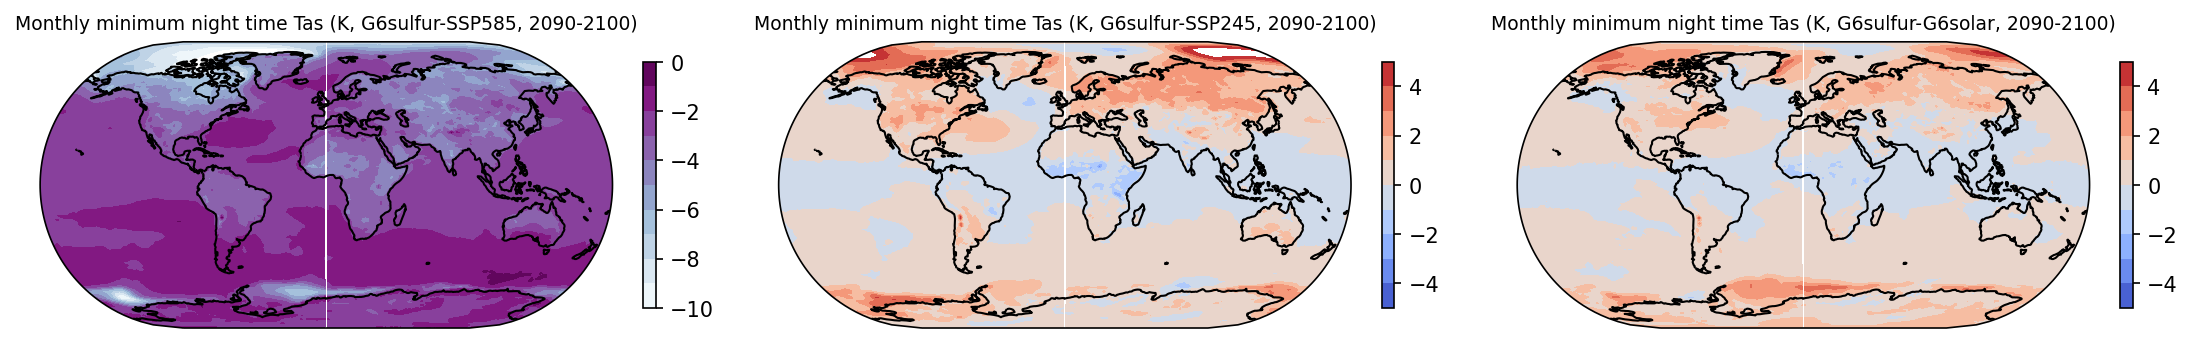

In [16]:
fig = plt.figure(figsize=(18,18),dpi=150)
ax = fig.add_subplot(1,3, 1, projection=ccrs.EckertIII())
filled_c = ax.contourf(ds_piC.lon, ds_piC.lat, (ds_sulfur-ds_585).mean('time'),
                transform=ccrs.PlateCarree(), levels=np.linspace(-10,0,11),
                cmap='BuPu')

fig.colorbar(filled_c, orientation='vertical',fraction=0.02)
ax.coastlines()
ax.set_global()
plt.title('Monthly minimum night time Tas (K, G6sulfur-SSP585, 2090-2100)',fontsize=9)

ax = fig.add_subplot(1, 3, 2, projection=ccrs.EckertIII())
filled_c = ax.contourf(ds_piC.lon, ds_piC.lat, (ds_sulfur-ds_245).mean('time'),
                transform=ccrs.PlateCarree(), levels=np.linspace(-5,5,11),
                cmap='coolwarm')

fig.colorbar(filled_c, orientation='vertical',fraction=0.02)
ax.coastlines()
ax.set_global()
plt.title('Monthly minimum night time Tas (K, G6sulfur-SSP245, 2090-2100)',fontsize=9)

ax = fig.add_subplot(1, 3, 3, projection=ccrs.EckertIII())
filled_c = ax.contourf(ds_piC.lon, ds_piC.lat, (ds_sulfur-ds_solar).mean('time'),
                transform=ccrs.PlateCarree(), levels=np.linspace(-5,5,11),
                cmap='coolwarm')

fig.colorbar(filled_c, orientation='vertical',fraction=0.02)
ax.coastlines()
ax.set_global()
plt.title('Monthly minimum night time Tas (K, G6sulfur-G6solar, 2090-2100)',fontsize=9)
plt.show()

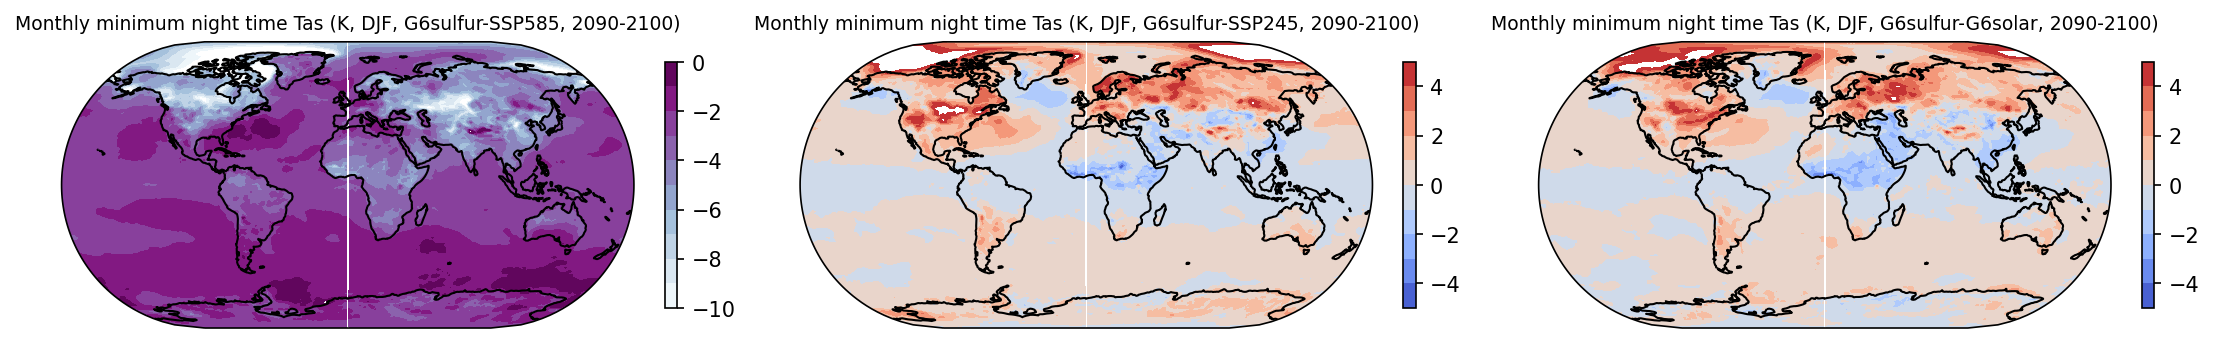

In [17]:
fig = plt.figure(figsize=(18,18),dpi=150)
ax = fig.add_subplot(1,3, 1, projection=ccrs.EckertIII())
filled_c = ax.contourf(ds_piC.lon, ds_piC.lat, (ds_sulfur-ds_585).groupby('time.month').mean('time').sel(month=[1,2,12]).mean('month'),
                transform=ccrs.PlateCarree(), levels=np.linspace(-10,0,11),
                cmap='BuPu')

fig.colorbar(filled_c, orientation='vertical',fraction=0.02)
ax.coastlines()
ax.set_global()
plt.title('Monthly minimum night time Tas (K, DJF, G6sulfur-SSP585, 2090-2100)',fontsize=9)

ax = fig.add_subplot(1, 3, 2, projection=ccrs.EckertIII())
filled_c = ax.contourf(ds_piC.lon, ds_piC.lat, (ds_sulfur-ds_245).groupby('time.month').mean('time').sel(month=[1,2,12]).mean('month'),
                transform=ccrs.PlateCarree(), levels=np.linspace(-5,5,11),
                cmap='coolwarm')

fig.colorbar(filled_c, orientation='vertical',fraction=0.02)
ax.coastlines()
ax.set_global()
plt.title('Monthly minimum night time Tas (K, DJF, G6sulfur-SSP245, 2090-2100)',fontsize=9)

ax = fig.add_subplot(1, 3, 3, projection=ccrs.EckertIII())
filled_c = ax.contourf(ds_piC.lon, ds_piC.lat, (ds_sulfur-ds_solar).groupby('time.month').mean('time').sel(month=[1,2,12]).mean('month'),
                transform=ccrs.PlateCarree(), levels=np.linspace(-5,5,11),
                cmap='coolwarm')

fig.colorbar(filled_c, orientation='vertical',fraction=0.02)
ax.coastlines()
ax.set_global()
plt.title('Monthly minimum night time Tas (K, DJF, G6sulfur-G6solar, 2090-2100)',fontsize=9)
plt.show()

In [4]:
ds_piC_m = xc.atmos.tx_max(xr.open_dataset('/badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/piControl/r1i1p1f2/day/tasmax/gn/files/d20191008/tasmax_day_UKESM1-0-LL_piControl_r1i1p1f2_gn_20500101-21491230.nc').sel(time = slice("2090", "2100")).tasmax, freq='MS')
ds_585_m = xc.atmos.tx_max(xr.open_dataset('/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp585/r1i1p1f2/day/tasmax/gn/files/d20190726/tasmax_day_UKESM1-0-LL_ssp585_r1i1p1f2_gn_20500101-21001230.nc').sel(time = slice("2090", "2100")).tasmax, freq='MS')
ds_245_m = xc.atmos.tx_max(xr.open_dataset('/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/r10i1p1f2/day/tasmax/gn/files/d20210507/tasmax_day_UKESM1-0-LL_ssp245_r10i1p1f2_gn_20510101-21001230.nc').sel(time = slice("2090", "2100")).tasmax, freq='MS')
ds_solar_m = xc.atmos.tx_max(xr.open_dataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6solar/r1i1p1f2/day/tasmax/gn/files/d20191031/tasmax_day_UKESM1-0-LL_G6solar_r1i1p1f2_gn_20500101-21001230.nc').sel(time = slice("2090", "2100")).tasmax, freq='MS')
ds_sulfur_m = xc.atmos.tx_max(xr.open_dataset('/badc/cmip6/data/CMIP6/GeoMIP/MOHC/UKESM1-0-LL/G6sulfur/r1i1p1f2/day/tasmax/gn/files/d20191113/tasmax_day_UKESM1-0-LL_G6sulfur_r1i1p1f2_gn_20500101-21001230.nc').sel(time = slice("2090", "2100")).tasmax, freq='MS')

/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: mean time: maximum`, expected `['time: maximum*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: mean time: maximum`, expected `['time: maximum*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: mean time: maximum`, expected `['time: maximum*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/cfchecks.py:40: UserWarning: Variable has a non-conforming cell_methods. Got `area: mean time: maximum`, expected `['time: maximum*']`
  check_valid(
/gws/pw/j05/cop26_hackathons/bristol/env/lib/python3.8/site-packages/xclim/core/

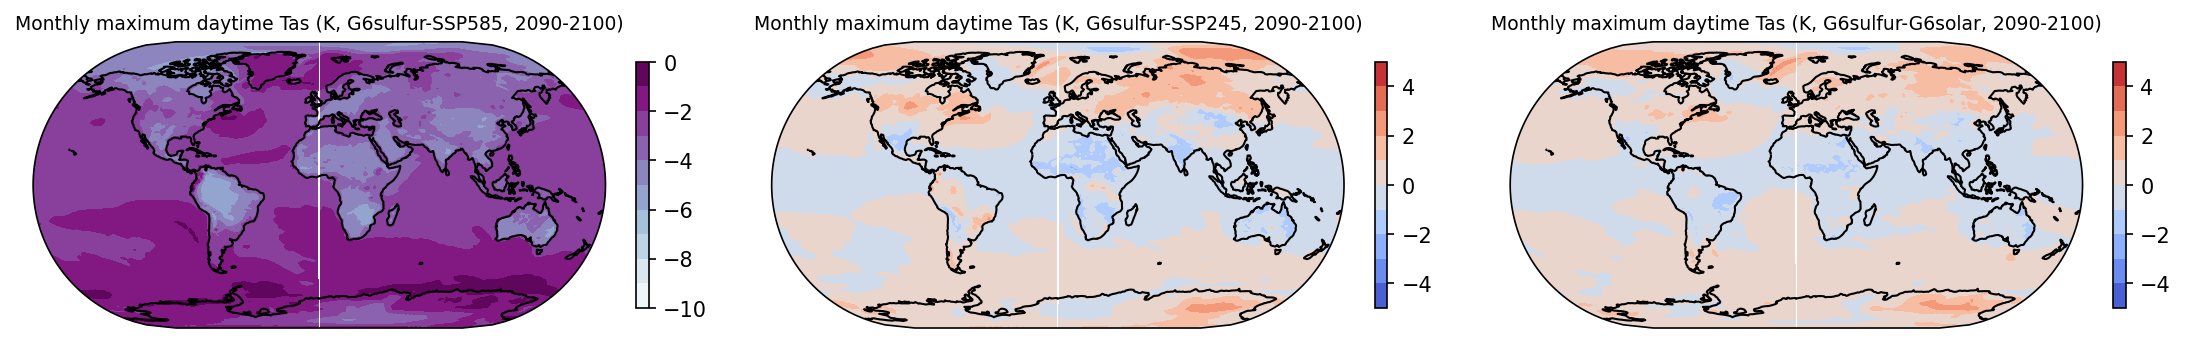

In [18]:
fig = plt.figure(figsize=(18,18),dpi=150)
ax = fig.add_subplot(1,3, 1, projection=ccrs.EckertIII())
filled_c = ax.contourf(ds_piC.lon, ds_piC.lat, (ds_sulfur_m-ds_585_m).mean('time'),
                transform=ccrs.PlateCarree(), levels=np.linspace(-10,0,11),
                cmap='BuPu')

fig.colorbar(filled_c, orientation='vertical',fraction=0.02)
ax.coastlines()
ax.set_global()
plt.title('Monthly maximum daytime Tas (K, G6sulfur-SSP585, 2090-2100)',fontsize=9)

ax = fig.add_subplot(1, 3, 2, projection=ccrs.EckertIII())
filled_c = ax.contourf(ds_piC.lon, ds_piC.lat, (ds_sulfur_m-ds_245_m).mean('time'),
                transform=ccrs.PlateCarree(), levels=np.linspace(-5,5,11),
                cmap='coolwarm')

fig.colorbar(filled_c, orientation='vertical',fraction=0.02)
ax.coastlines()
ax.set_global()
plt.title('Monthly maximum daytime Tas (K, G6sulfur-SSP245, 2090-2100)',fontsize=9)

ax = fig.add_subplot(1, 3, 3, projection=ccrs.EckertIII())
filled_c = ax.contourf(ds_piC.lon, ds_piC.lat, (ds_sulfur_m-ds_solar_m).mean('time'),
                transform=ccrs.PlateCarree(), levels=np.linspace(-5,5,11),
                cmap='coolwarm')

fig.colorbar(filled_c, orientation='vertical',fraction=0.02)
ax.coastlines()
ax.set_global()
plt.title('Monthly maximum daytime Tas (K, G6sulfur-G6solar, 2090-2100)',fontsize=9)
plt.show()

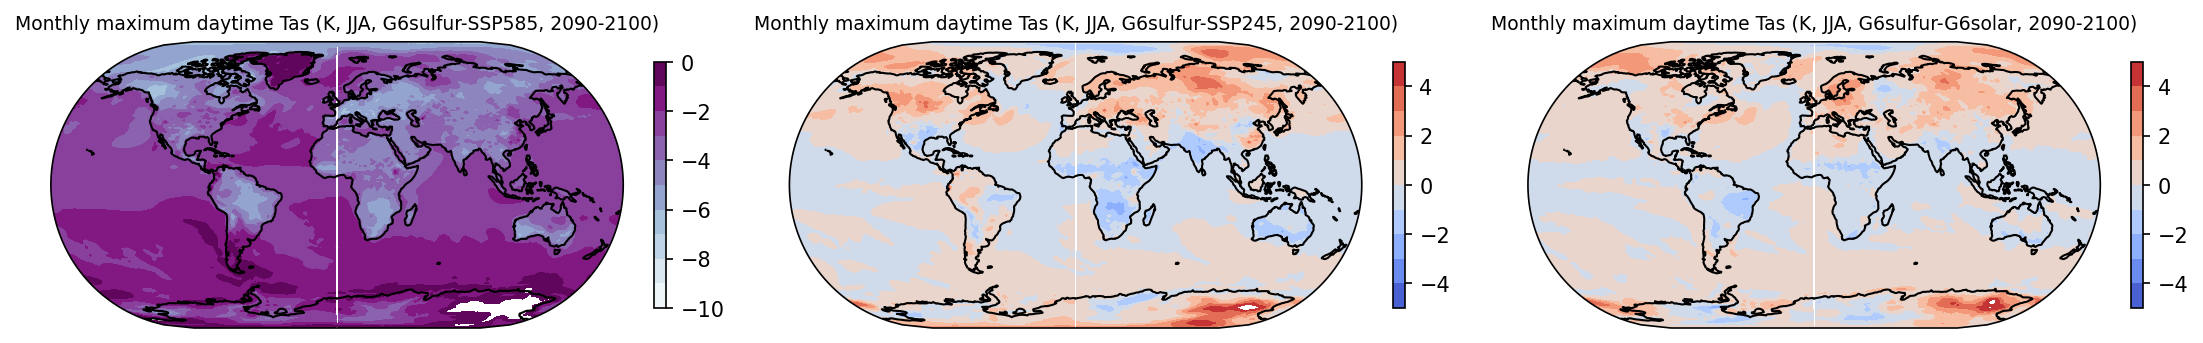

In [19]:
fig = plt.figure(figsize=(18,18),dpi=150)
ax = fig.add_subplot(1,3, 1, projection=ccrs.EckertIII())
filled_c = ax.contourf(ds_piC.lon, ds_piC.lat, (ds_sulfur_m-ds_585_m).groupby('time.month').mean('time').sel(month=[6,7,8]).mean('month'),
                transform=ccrs.PlateCarree(), levels=np.linspace(-10,0,11),
                cmap='BuPu')

fig.colorbar(filled_c, orientation='vertical',fraction=0.02)
ax.coastlines()
ax.set_global()
plt.title('Monthly maximum daytime Tas (K, JJA, G6sulfur-SSP585, 2090-2100)',fontsize=9)

ax = fig.add_subplot(1, 3, 2, projection=ccrs.EckertIII())
filled_c = ax.contourf(ds_piC.lon, ds_piC.lat, (ds_sulfur_m-ds_245_m).groupby('time.month').mean('time').sel(month=[6,7,8]).mean('month'),
                transform=ccrs.PlateCarree(), levels=np.linspace(-5,5,11),
                cmap='coolwarm')

fig.colorbar(filled_c, orientation='vertical',fraction=0.02)
ax.coastlines()
ax.set_global()
plt.title('Monthly maximum daytime Tas (K, JJA, G6sulfur-SSP245, 2090-2100)',fontsize=9)

ax = fig.add_subplot(1, 3, 3, projection=ccrs.EckertIII())
filled_c = ax.contourf(ds_piC.lon, ds_piC.lat, (ds_sulfur_m-ds_solar_m).groupby('time.month').mean('time').sel(month=[6,7,8]).mean('month'),
                transform=ccrs.PlateCarree(), levels=np.linspace(-5,5,11),
                cmap='coolwarm')

fig.colorbar(filled_c, orientation='vertical',fraction=0.02)
ax.coastlines()
ax.set_global()
plt.title('Monthly maximum daytime Tas (K, JJA, G6sulfur-G6solar, 2090-2100)',fontsize=9)
plt.show()